![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Data-X: Introduction to Numpy

**Author:** Alexander Fred Ojala, Ikhlaq Sidhu

**License Agreement:** Feel free to do whatever you want with this code

___

# What is NumPy:  

NumPy stands for **Numerical Python** and it is the fundamental package for scientific computing in Python. It is a package that lets you efficiently store and manipulate numerical arrays. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities


# NumPy contains an array object that is "fast"


<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/threefundamental.png">


**It stores / consists of**:
* location of a memory block (allocated all at one time)
* a shape (3 x 3 or 1 x 9, etc)
* data type / size of each element

The core feauture that NumPy supports is its multi-dimensional arrays. In NumPy, dimensions are called axes and the number of axes is called a rank.

In [1]:
# written for Python 3.x
import numpy as np

In [2]:
np.__version__

'1.16.4'


## Creating a NumPy Array: - 
### 1. Simplest possible: We use a list as an argument input in making a NumPy Array


In [13]:
# Create array from Python list
list1 = [1, 2, 3, 4]
data = np.array(list1)
data

array([1, 2, 3, 4])

In [14]:
# Find out object type
type(data)

numpy.ndarray

In [15]:
# See data type that is stored in the array
data.dtype

dtype('int64')

In [16]:
data

array([1, 2, 3, 4])

In [17]:
# The data types are specified for the full array, if we store
# a float in an int array, the float will be up-casted to an int
data[0] = 3.14159
data

array([3, 2, 3, 4])

In [18]:
# NumPy converts to most logical data type
data2 = np.array([1.2, 2, 3, 4])
print(data2)
print(data2.dtype) # all values will be converted to floats

[1.2 2.  3.  4. ]
float64


In [19]:
# the elements of an array must be of a type that is valid to perform
# a specific mathematical operation on

data = np.array([1,2,'cat', 4])
print(data)
print(data.dtype)

['1' '2' 'cat' '4']
<U21


In [20]:
# lists can also be much longer
data = np.array(range(1,100001))
print(data)
print()
print(len(data)) # to see the length of the full array

[     1      2      3 ...  99998  99999 100000]

100000


### More info on data types can be found here:
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

# Accessing elements: Slicing and indexing
<img src='https://qph.fs.quoracdn.net/main-qimg-6400819662432f726e2b29e2dd40b646' style='width:600px'>

In [21]:
# Similar to indexing and slicing Python lists:
data = np.array(range(10))
print(data[:])
print (data[0:3])
print (data[3:])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[3 4 5 6 7 8 9]


In [22]:
print (data[::-1]) # [start : end : step_size]

[9 8 7 6 5 4 3 2 1 0]


## Arrays are like lists, but different
NumPy utilizes efficient pointers to a location in memory and it will store the full array. Lists on the other hand are pointers to many different objects in memory.

In [23]:
# Slicing returns a view in Numpy, 
# and not a copy as is the case with Python lists
data = np.array(range(10))
np_slice = data[0:3]
print(np_slice)

[0 1 2]


In [24]:
l = list(range(10))
list_slice = l[0:3]
print(list_slice)

[0, 1, 2]


In [25]:
np_slice[0] = 99
list_slice[0] = 99
print(np_slice)
print(list_slice)

[99  1  2]
[99, 1, 2]


In [26]:
print('Python list:',l) # has not changed
print('NumPy array:',data) # has changed

Python list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
NumPy array: [99  1  2  3  4  5  6  7  8  9]


In [27]:
# Creating copies of the array instead of views
data = np.array(range(10))
arr_copy = data[:3].copy()
print('Array copy',arr_copy)

Array copy [0 1 2]


In [28]:
arr_copy[0] = 555
print('Array copy',arr_copy)
print('Original array',data) # now it is not a view any more

Array copy [555   1   2]
Original array [0 1 2 3 4 5 6 7 8 9]


# Question - 
Making train and test sets: Create two arrays from array a, one with 2/3 and the other with 1/3 of the elements. 

Note that you don't want to mess up your original data set when you (later) make transformations on the train / test set.

In [29]:
a = np.arange(1000)
np.random.shuffle(a) # inplace

train = a.copy()[:2*len(a)//3]
test = a.copy()[2*len(a)//3:]

#input answer

# Arrays are also a lot faster than lists

In [30]:
# Arrays are faster and more efficient than lists
x = list(range(100000))

# Say that we want to square all elements
y = [i**2 for i in x[0:10]]
print (y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [31]:
# Time the operation with some IPython magic command
print('Time for Python lists:')
list_time = %timeit -o -n 20 [i**2 for i in x]

Time for Python lists:
20.8 ms ± 636 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [32]:
z = np.array(x)
w = z**2
print(w[:10])

[ 0  1  4  9 16 25 36 49 64 81]


In [33]:
print('Time for NumPy arrays:')
np_time = %timeit -o -n 20 z**2

Time for NumPy arrays:
49.8 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [34]:
print('NumPy is ' + str(list_time.all_runs[0]//np_time.all_runs[0]) + \
      ' times faster than lists at squaring 100 000 elements.')

NumPy is 268.0 times faster than lists at squaring 100 000 elements.


# Universal functions
A function that is applied on an `ndarray` in an element-by-element fashion. Several universal functions can be found the NumPy documentation here:
https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html

In [35]:
# Arrays are different than lists in another way:
# x and y are lists

x = list(range(5))
y = list(range(5,10))
print ("list x = ", x)
print ("list y = ", y)

list x =  [0, 1, 2, 3, 4]
list y =  [5, 6, 7, 8, 9]


In [36]:
print ("x + y = ", x+y)

x + y =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [37]:
# now lets try with NumPy arrays:
xn = np.array(x)
yn = np.array(y)
print ('np.array xn =', xn)
print ('np.array xn =', yn)

np.array xn = [0 1 2 3 4]
np.array xn = [5 6 7 8 9]


In [38]:
print ("xn + yn = ", xn + yn)

xn + yn =  [ 5  7  9 11 13]


In [39]:
# + for np.arrays is a wrapper around the u. function np.add
np.add(xn,yn)

array([ 5,  7,  9, 11, 13])

In [40]:
# An array is a sequence that can be manipulated easily
# An arithmetic operation is applied to each element individually
# When two arrays are added, they must have the same size 
# (otherwise they might be broadcasted)

# python lists
print (3* x)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [41]:
# Numpy Arrays
print (3 * xn)

[ 0  3  6  9 12]


# Join, add, concatenate

In [42]:
print(xn)
print(yn)

[0 1 2 3 4]
[5 6 7 8 9]


In [43]:
# if you need to join numpy arrays, 
# try hstack, vstack, column_stack, or concatenate
np.hstack([xn, yn])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
np.vstack([xn, yn])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [45]:
np.column_stack([xn, yn])

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [46]:
np.concatenate([xn, yn],axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Creating arrays with 2 axis:


In [47]:
# This list has two dimensions
list3 = [[1, 2, 3],
         [4, 5, 6]]
list3 # nested list

[[1, 2, 3], [4, 5, 6]]

In [48]:
# data = np.array([[1, 2, 3], [4, 5, 6]])
data = np.array(list3)
data

array([[1, 2, 3],
       [4, 5, 6]])

### Attributes of a multidim array

In [50]:
data.ndim

2

In [49]:
print('Dimensions:',data.ndim)
print ('Shape:',data.shape)
print('Size:', data.size)

Dimensions: 2
Shape: (2, 3)
Size: 6


In [ ]:
np.transpose(data)

# Other ways to create NumPy arrays

In [51]:
# np.arange() is similar to built in range()
# Creates array with a range of consecutive numbers
# starts at 0 and step=1 if not specified. Exclusive of stop.

print(np.arange(12))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [52]:
# Array increasing from start to end by step: np.arange(start, end, step)
# The range always includes start but excludes end
print(np.arange(1, 10, 2))

[1 3 5 7 9]


In [53]:
# Returns a new array of specified size, filled with zeros.
print(np.zeros((2,5), dtype=np.int8))

[[0 0 0 0 0]
 [0 0 0 0 0]]


In [54]:
#Returns a new array of specified size, filled with ones.
print(np.ones((4,2), dtype=np.float128))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [55]:
# Returns the identity matrix of specific squared size
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Some useful indexing strategies

### There are two main types of indexing: Integer and Boolean

In [56]:
x = np.array([[1, 2], [3, 4], [5, 6]]) 
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [57]:
## Integer indexing
# first element is  the row, 2nd element is the column
x[1,0]

3

In [58]:
x[1:,:] # all rows after first, all columns

array([[3, 4],
       [5, 6]])

In [61]:
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [62]:
## Boolean indexing
print('Comparison operator, find all values greater than 3:\n')
x>3

Comparison operator, find all values greater than 3:



array([[False, False],
       [False,  True],
       [ True,  True]])

In [63]:
x[x>3]

array([4, 5, 6])

In [60]:
print('Boolean indexing, only extract elements greater than 3:\n')
print(x[x>3])

Boolean indexing, only extract elements greater than 3:

[4 5 6]


## Extra NumPy array methods

In [64]:
# Reshape is used to change the shape
a = np.arange(0, 15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [65]:
a = a.reshape(3, 5)
print ('Reshaped:')
print(a)

Reshaped:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [66]:
# We can also flatten matrices using ravel()
x = np.array(range(24))
x = x.reshape(4,6)
print('Original:\n',x)
print()
x = x.ravel() # make it flat
print ('Flattened:\n',x)

Original:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

Flattened:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [67]:
# We can also easily find the sum, min, max, .. are easy
print (a)
print()
print ('Sum:',a.sum())
print('Min:', a.min())
print('Max:', a.max())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Sum: 105
Min: 0
Max: 14


In [69]:
print ('Column sum:',a.sum(axis=0))
print ('Row sum:',a.sum(axis=1))

# Note here axis specifies what dimension to "collapse"

Column sum: [15 18 21 24 27]
Row sum: [10 35 60]


In [70]:
# To get the cumulative product:
print (np.arange(1, 10))
print (np.cumprod(np.arange(1, 10)))

[1 2 3 4 5 6 7 8 9]
[     1      2      6     24    120    720   5040  40320 362880]


In [71]:
# To get the cumulative sum:
print (np.arange(1, 10))
print(np.cumsum((np.arange(1, 10))))

[1 2 3 4 5 6 7 8 9]
[ 1  3  6 10 15 21 28 36 45]


In [72]:
# Creating a 3D array:
a = np.arange(0, 96).reshape(2, 6, 8)
print(a)

[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]
  [16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]
  [32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]

 [[48 49 50 51 52 53 54 55]
  [56 57 58 59 60 61 62 63]
  [64 65 66 67 68 69 70 71]
  [72 73 74 75 76 77 78 79]
  [80 81 82 83 84 85 86 87]
  [88 89 90 91 92 93 94 95]]]


In [73]:
# The same methods typically apply in multiple dimensions
print (a.sum(axis = 0))
print ('---')
print (a.sum(axis = 1))

[[ 48  50  52  54  56  58  60  62]
 [ 64  66  68  70  72  74  76  78]
 [ 80  82  84  86  88  90  92  94]
 [ 96  98 100 102 104 106 108 110]
 [112 114 116 118 120 122 124 126]
 [128 130 132 134 136 138 140 142]]
---
[[120 126 132 138 144 150 156 162]
 [408 414 420 426 432 438 444 450]]


## Arrray Axis
<img src= "https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/anatomyarray.png">



---
# More ufuncs and Basic Operations

One of the coolest parts of NumPy is the ability for you to run mathematical operations on top of arrays. Here are some basic operations:

In [74]:
a = np.arange(11, 21)
b = np.arange(0, 10)
print ("a = ",a)
print ("b = ",b)

a =  [11 12 13 14 15 16 17 18 19 20]
b =  [0 1 2 3 4 5 6 7 8 9]


In [77]:
print (a + b)
print (a * b) # Hadamard product
print (a ** 2)

[11 13 15 17 19 21 23 25 27 29]
[  0  12  26  42  60  80 102 126 152 180]
[121 144 169 196 225 256 289 324 361 400]


In [76]:
# Dot product / matrix multiplications
print (a.dot(b))

780


In [80]:
d.dot(c)

array([[23, 34],
       [31, 46]])

In [78]:
print ('Matrix multiplication')
c = np.arange(1,5).reshape(2,2)
print ("c = \n", c)
print()
d = np.arange(5,9).reshape(2,2)
print ("d = \n", d)
print()
print (np.matmul(c,d)) # not commutative

Matrix multiplication
c = 
 [[1 2]
 [3 4]]

d = 
 [[5 6]
 [7 8]]

[[19 22]
 [43 50]]


# Random numbers

In [92]:
# Radom numbers
np.random.seed(1337)  # set the seed to zero for reproducibility
print(np.random.uniform(1,5,10))   # 10 random uniform numbers 1 to 5

[2.0480987  1.63473589 2.11250608 2.83726755 2.28400216 3.07357128
 2.0477717  4.90434114 3.93125821 1.46109691]


In [101]:
np.random.seed(1337)
print (np.random.exponential(1, 5)) # 5 random exp numbers with rate 1

[0.30384489 0.17278791 0.32590539 0.61492192 0.38713495]


In [102]:
print (np.random.randn(8).reshape(2,4)) #8 random numbers from normal distr, 2 x 4 array

[[-1.71433465  0.13245332 -0.2660386  -0.89999532]
 [-0.91189794  0.31252817 -0.03804525  0.32402788]]


### If you want to learn more about "random" numbers in NumPy go to: https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.random.html

# Trignometric functions

In [103]:
# linspace: Create an array of numbers from a to b 
# with n equally spaced numbers (inclusive)

data = np.linspace(0,10,5)
print (data)

[ 0.   2.5  5.   7.5 10. ]


In [104]:
x = np.linspace(0,np.pi, 3)
print('x = ', x)
print()
print ("sin(x) = ", np.sin(x))

x =  [0.         1.57079633 3.14159265]

sin(x) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [106]:
x = np.linspace(0,4*np.pi,1000)
y = np.sin(x)-np.cos(x)**2

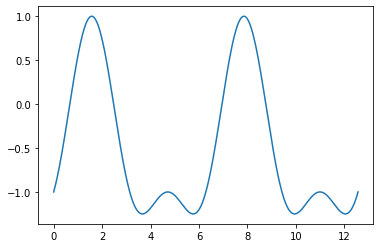

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)

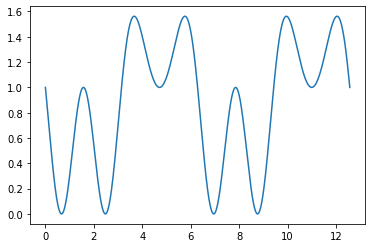

In [109]:
plt.plot(x,y**2)

# Prediction Example (Ordinary Least Square)

In [ ]:
# Generate data w linear trend
x = np.linspace(0,10,50)
Y = 5 + x*2 + np.random.normal(0,2.5,len(x))

In [ ]:
plt.scatter(x,Y);

In [ ]:
X = np.column_stack([np.ones(len(x)),x])

In [ ]:
X[:4,:]

Remeber:
$Y \in R^{50x1}, X \in R^{50x2}, W \in R^{2x1}$
$$\hat{Y} = XW$$
$$ SE = (Y-XW)^2$$
$$ \nabla_W SE = 2X^T(Y-XW) = 0$$
$$W_{ols} = (X^TX)^{-1}X^TY$$

In [ ]:
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [ ]:
W

In [ ]:
plt.scatter(x,Y);
plt.plot(x,W[0]+W[1]*x,c='red');